In [1]:
import numpy as np
from timeit import timeit
from scipy import fftpack
import pyfftw
pyfftw.interfaces.cache.enable() 

# FFT vs RFFT #

In [2]:
num = 100 

pows_of_two = range(4,12)

timing = []
for n in pows_of_two:
    res = []
    N = 2**n
    print 'N = %g' % N
    setup = 'import numpy as np; import pyfftw; a = np.random.rand(%g,%g)' % (N,N)
    a = np.random.rand(N,N)
    print 'Numpy - FFT'
    r = timeit('b=np.fft.fft2(a); c=np.fft.ifft2(b)', number=num, setup=setup)
    print r
    res.append(r)
    print 'Numpy - RFFT'
    r = timeit('b=np.fft.rfft2(a); c=np.fft.irfft2(b)', number=num, setup=setup)
    print r
    res.append(r)
    print 'FFTW - FFT'
    r = timeit('b=pyfftw.interfaces.numpy_fft.fft2(a); c=pyfftw.interfaces.numpy_fft.ifft2(b)', number=num, setup=setup)
    print r
    res.append(r)
    print'FFTW - RFFT'
    r = timeit('b=pyfftw.interfaces.numpy_fft.rfft2(a); c=pyfftw.interfaces.numpy_fft.irfft2(b)', number=num, setup=setup)
    print r
    res.append(r)
    timing.append(res)

N = 16
Numpy - FFT
0.0126271247864
Numpy - RFFT
0.0128500461578
FFTW - FFT
0.0117309093475
FFTW - RFFT
0.0117239952087
N = 32
Numpy - FFT
0.0156888961792
Numpy - RFFT
0.0138339996338
FFTW - FFT
0.0492889881134
FFTW - RFFT
0.0395319461823
N = 64
Numpy - FFT
0.039587020874
Numpy - RFFT
0.0246529579163
FFTW - FFT
0.0810730457306
FFTW - RFFT
0.0613520145416
N = 128
Numpy - FFT
0.11240696907
Numpy - RFFT
0.0669031143188
FFTW - FFT
0.174602031708
FFTW - RFFT
0.12766289711
N = 256
Numpy - FFT
0.479065895081
Numpy - RFFT
0.226497173309
FFTW - FFT
0.428647994995
FFTW - RFFT
0.273625135422
N = 512
Numpy - FFT
2.61120986938
Numpy - RFFT
1.2455701828
FFTW - FFT
1.47942399979
FFTW - RFFT
0.830262899399
N = 1024
Numpy - FFT
11.9729690552
Numpy - RFFT
6.56950998306
FFTW - FFT
7.14905405045
FFTW - RFFT
3.31816792488
N = 2048
Numpy - FFT
64.5575730801
Numpy - RFFT
34.820089817
FFTW - FFT
59.1609258652
FFTW - RFFT
18.5530788898


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

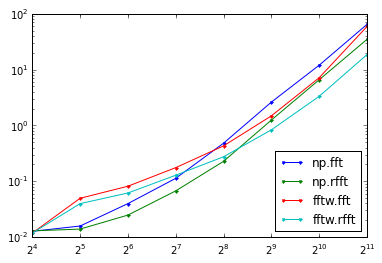

In [4]:
x = 2**np.array(pows_of_two)
T =  np.array(timing)
plt.loglog(x, T, '.-', basex=2)
plt.legend(['np.fft','np.rfft','fftw.fft','fftw.rfft'], loc='lower right')

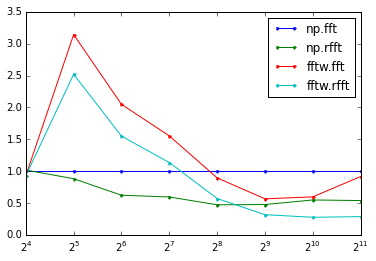

In [5]:
plt.semilogx(x, T/T[:,0][:,np.newaxis], '.-', basex=2)
plt.legend(['np.fft','np.rfft','fftw.fft','fftw.rfft'], loc='upper right')

# FFTW Thread Scaling #

In [6]:
num = 100 

pows_of_two = range(4,12)
nthreads = [1,2,4,8]

setup_raw = """
import numpy as np
import pyfftw
pyfftw.interfaces.cache.enable()
a = np.random.rand({N},{N})
nth={nth}
"""


timing_threads = []
for n in pows_of_two:
    res = []
    N = 2**n
    print '*** N = %g ***' % N
    for nth in nthreads:
        print 'FFTW - threads = %g' % nth
        setup = setup_raw.format(N=N, nth=nth)
        r = timeit('b=pyfftw.interfaces.numpy_fft.rfft2(a, threads=nth); c=pyfftw.interfaces.numpy_fft.irfft2(b, threads=nth)',
                   number=num, setup=setup)
        print r
        res.append(r)
    timing_threads.append(res)

*** N = 16 ***
FFTW - threads = 1
0.0137579441071
FFTW - threads = 2
0.0384249687195
FFTW - threads = 4
0.0443840026855
FFTW - threads = 8
0.0585391521454
*** N = 32 ***
FFTW - threads = 1
0.00789499282837
FFTW - threads = 2
0.0728950500488
FFTW - threads = 4
0.0808968544006
FFTW - threads = 8
0.120270967484
*** N = 64 ***
FFTW - threads = 1
0.0120129585266
FFTW - threads = 2
0.0826549530029
FFTW - threads = 4
0.117933988571
FFTW - threads = 8
0.148050069809
*** N = 128 ***
FFTW - threads = 1
0.0321800708771
FFTW - threads = 2
0.152986049652
FFTW - threads = 4
0.187966108322
FFTW - threads = 8
0.181710004807
*** N = 256 ***
FFTW - threads = 1
0.120110988617
FFTW - threads = 2
0.230993032455
FFTW - threads = 4
0.278555870056
FFTW - threads = 8
0.267518043518
*** N = 512 ***
FFTW - threads = 1
0.600498199463
FFTW - threads = 2
0.977483034134
FFTW - threads = 4
0.793282032013
FFTW - threads = 8
0.711469888687
*** N = 1024 ***
FFTW - threads = 1
3.28809094429
FFTW - threads = 2
3.748471975

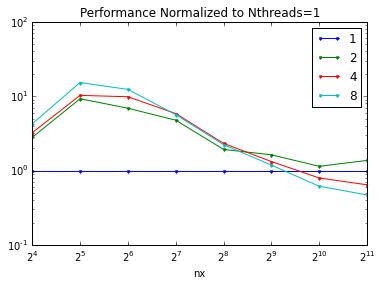

In [8]:
Th = np.array(timing_threads)
plt.loglog(x, Th/Th[:,0][:,np.newaxis], '.-', basex=2)
plt.legend(nthreads, loc='upper right')
plt.xlabel('nx')
plt.title('Performance Normalized to Nthreads=1')

In [9]:
# try fancier fftw stuff

N = 2**11
print N
shape_real = (N, N)
shape_cplx = (N, N/2+1)

fwd_in = pyfftw.empty_aligned( shape_real, dtype='float64')
fwd_out = pyfftw.empty_aligned( shape_cplx, dtype='complex128')
bkw_out = pyfftw.empty_aligned( shape_real, dtype='float64')
bkw_in = pyfftw.empty_aligned( shape_cplx, dtype='complex128')

# apparently the arrays will be "destroyed during the planning proccess"
fwd_fft = pyfftw.FFTW(fwd_in, fwd_out, axes=(-2,-1), direction='FFTW_FORWARD', threads=8)
bkw_fft = pyfftw.FFTW(bkw_in, bkw_out, axes=(-2,-1), direction='FFTW_BACKWARD', threads=8)


2048


This shows that transforming forwand and backward 1000 times introduces significant errors

In [10]:
ao = np.random.rand(*shape_real)
ain = pyfftw.byte_align( ao, dtype='float64')
bout = pyfftw.empty_aligned( shape_cplx, dtype='complex128')
fwd_fft.update_arrays(ain, bout)
bkw_fft.update_arrays(bout, ain)

#ain[:] = ao
for n in xrange(1000):
    fwd_fft()
    bkw_fft()
print np.abs(ain - ao).sum()

1.51304353259e-07


In [11]:
num = 100 

setup_raw = """
import pyfftw
shape_real = ({N}, {N})
shape_cplx = ({N}, {N}/2+1)

fwd_in = pyfftw.empty_aligned( shape_real, dtype='float64')
fwd_out = pyfftw.empty_aligned( shape_cplx, dtype='complex128')
bkw_out = pyfftw.empty_aligned( shape_real, dtype='float64')
bkw_in = pyfftw.empty_aligned( shape_cplx, dtype='complex128')

# apparently the arrays will be "destroyed during the planning proccess"
fwd_fft = pyfftw.FFTW(fwd_in, fwd_out, axes=(-2,-1), direction='FFTW_FORWARD', threads={nth})
bkw_fft = pyfftw.FFTW(bkw_in, bkw_out, axes=(-2,-1), direction='FFTW_BACKWARD', threads={nth})""" 

pows_of_two = range(4,12)
nthreads = [1,2,4,8]

timing_threads_plan = []
for n in pows_of_two:
    res = []
    N = 2**n
    print '*** N = %g ***' % N
    for nth in nthreads:
        print 'FFTW - threads = %g' % nth
        setup = setup_raw.format(N=N, nth=nth)
        r = timeit('fwd_fft(); bkw_fft()',
                   number=num, setup=setup)
        print r
        res.append(r)
    timing_threads_plan.append(res)

*** N = 16 ***
FFTW - threads = 1
0.0044150352478
FFTW - threads = 2
0.0134921073914
FFTW - threads = 4
0.0145518779755
FFTW - threads = 8
0.0251610279083
*** N = 32 ***
FFTW - threads = 1
0.00588011741638
FFTW - threads = 2
0.00800585746765
FFTW - threads = 4
0.0127151012421
FFTW - threads = 8
0.0158741474152
*** N = 64 ***
FFTW - threads = 1
0.00502109527588
FFTW - threads = 2
0.0073070526123
FFTW - threads = 4
0.0146720409393
FFTW - threads = 8
0.0230669975281
*** N = 128 ***
FFTW - threads = 1
0.0224559307098
FFTW - threads = 2
0.0193159580231
FFTW - threads = 4
0.0298471450806
FFTW - threads = 8
0.0429508686066
*** N = 256 ***
FFTW - threads = 1
0.110805988312
FFTW - threads = 2
0.08673787117
FFTW - threads = 4
0.07479596138
FFTW - threads = 8
0.0487058162689
*** N = 512 ***
FFTW - threads = 1
0.521282911301
FFTW - threads = 2
0.311352014542
FFTW - threads = 4
0.260825872421
FFTW - threads = 8
0.187079191208
*** N = 1024 ***
FFTW - threads = 1
2.79958200455
FFTW - threads = 2
1.71

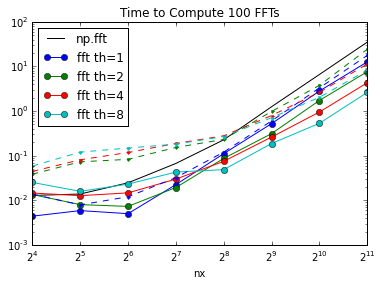

In [25]:
Thp = np.array(timing_threads_plan)

ax = plt.subplot(111)
ax.loglog(x, T[:,1], 'k-', basex=2)
ax.loglog(x, Thp, 'o-', basex=2)
ax.set_color_cycle(plt.rcParams['axes.color_cycle'])
ax.loglog(x, Th, '.--', basex=2)
ax.legend(['np.fft',] + ['fft th=%g' % nth for nth in nthreads], loc='upper left')
ax.set_xlabel('nx')
ax.set_title('Time to Compute 100 FFTs')

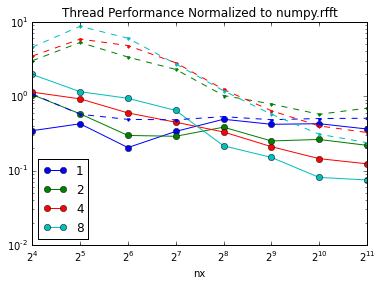

In [21]:
Thp = np.array(timing_threads_plan)
ax = plt.subplot(111)
ax.loglog(x, Thp/T[:,1][:,np.newaxis], 'o-', basex=2)
ax.set_color_cycle(plt.rcParams['axes.color_cycle'])
ax.loglog(x, Th/T[:,1][:,np.newaxis], '.--', basex=2)
ax.legend(nthreads, loc='lower left')
ax.set_xlabel('nx')
ax.set_title('Thread Performance Normalized to numpy.rfft')